In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [3]:
data=pd.read_csv(r"C:\Users\shobi\Downloads\diabetes_012_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [5]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

##Univariate

BoxPlot

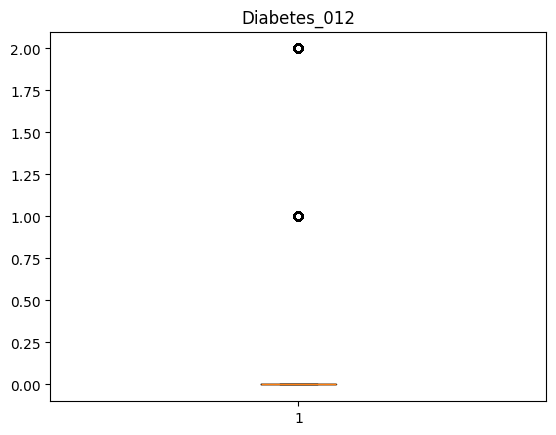

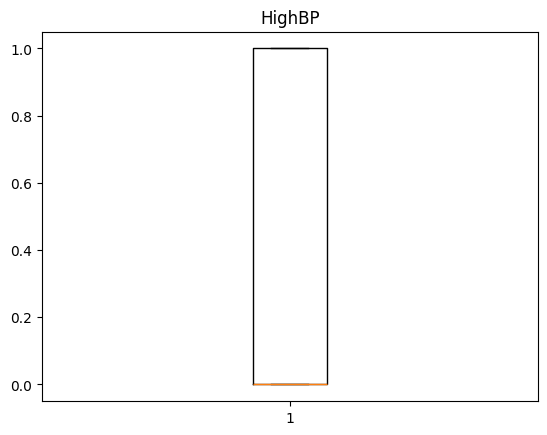

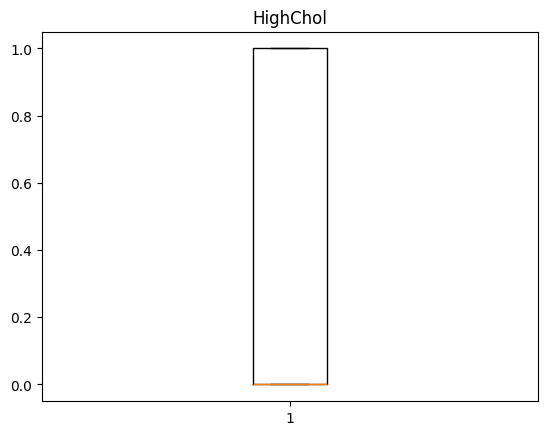

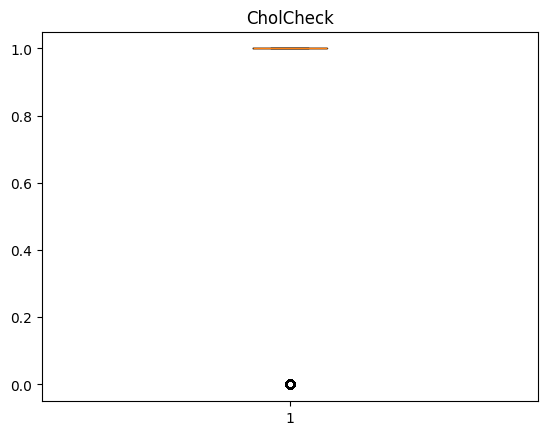

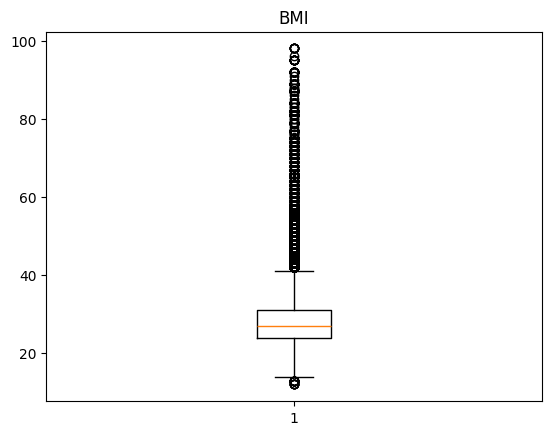

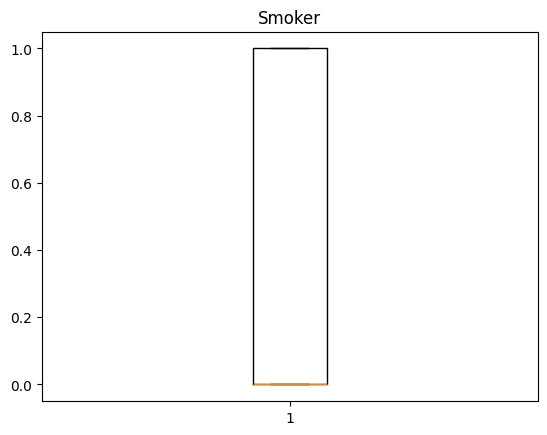

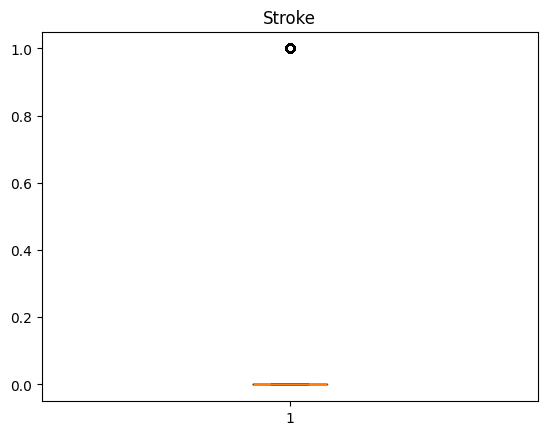

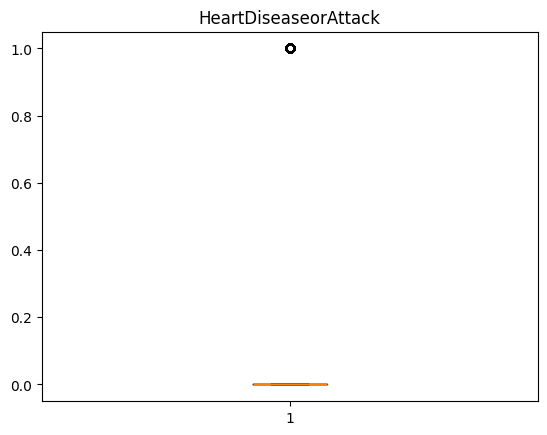

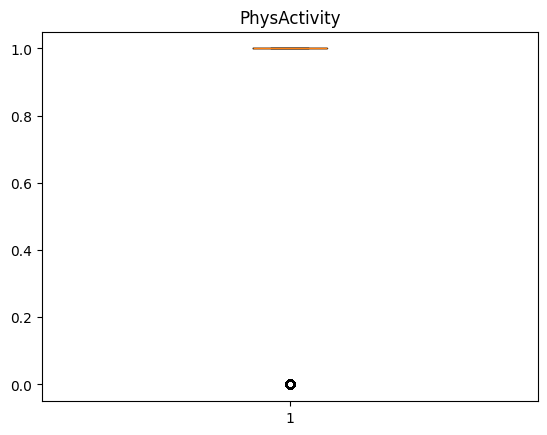

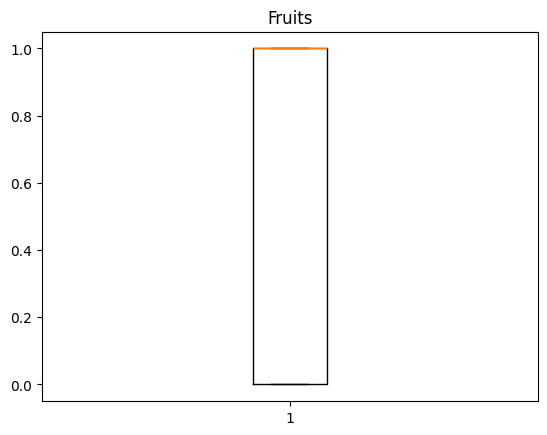

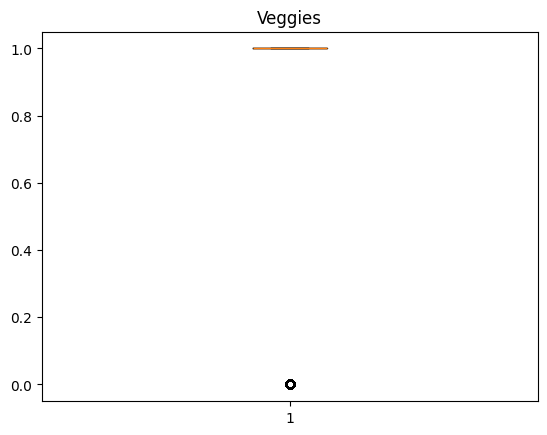

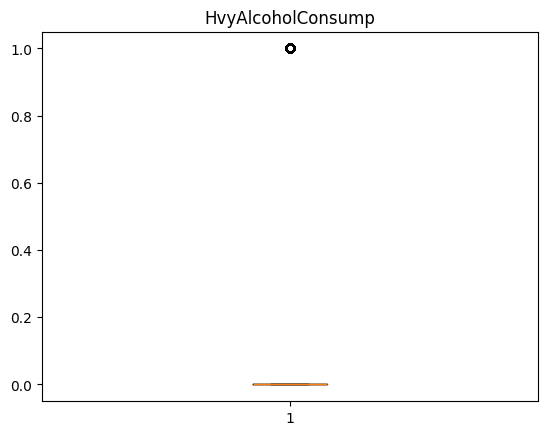

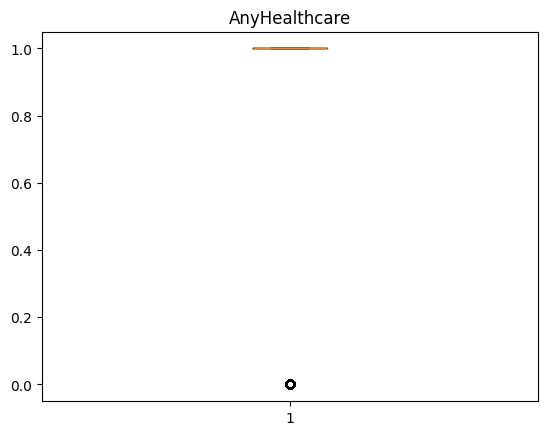

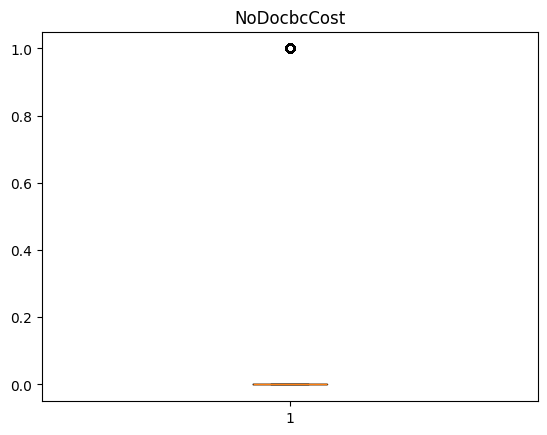

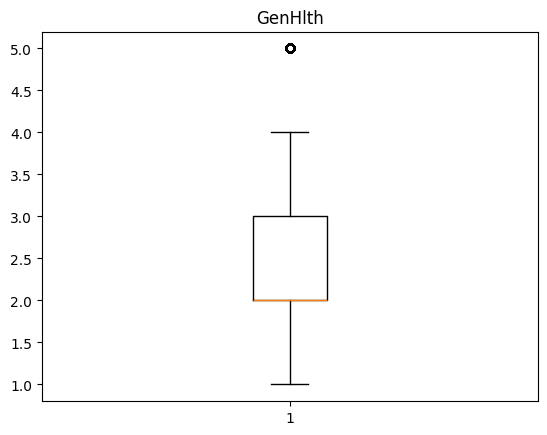

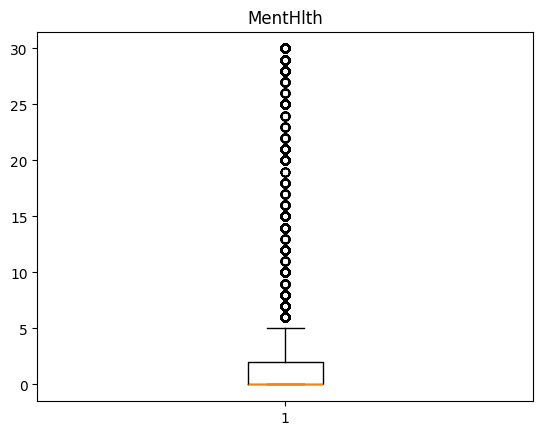

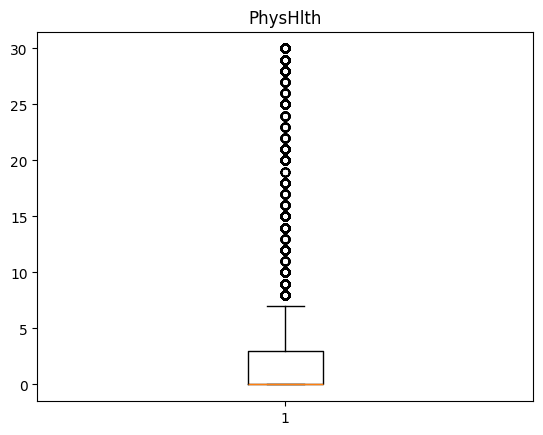

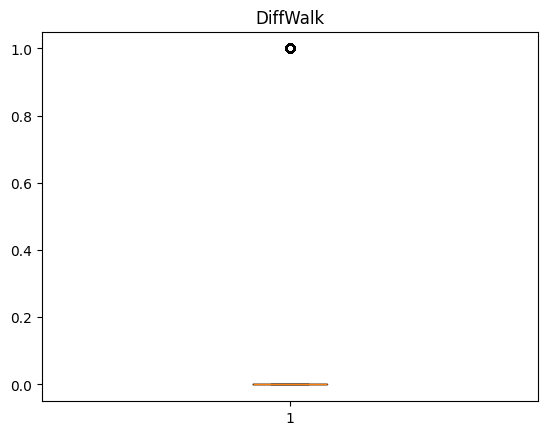

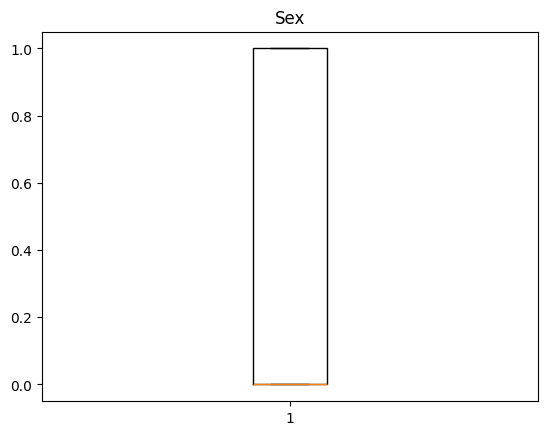

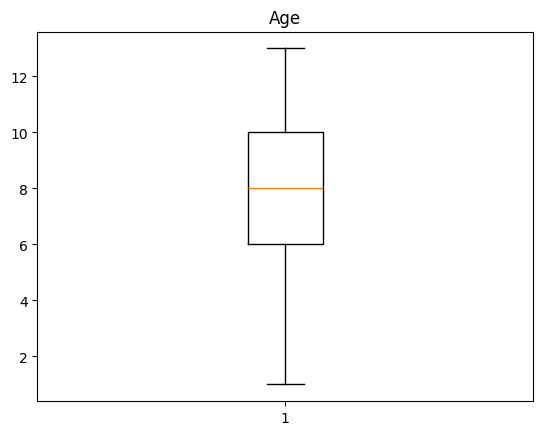

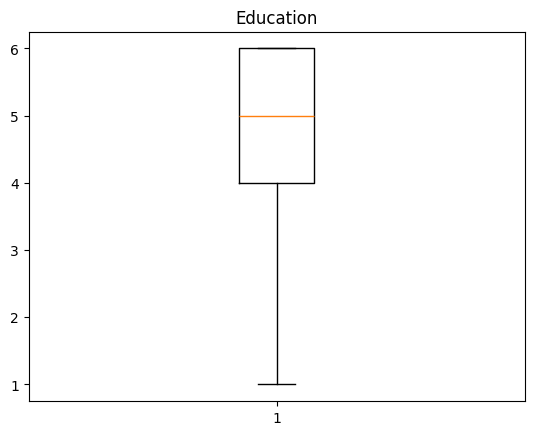

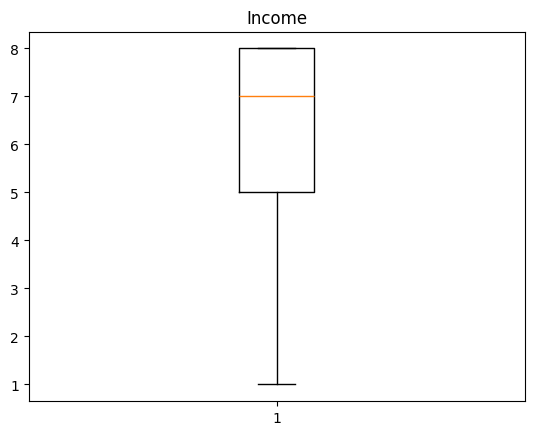

In [8]:
for i in data.columns:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

Bivariate

Line Chart


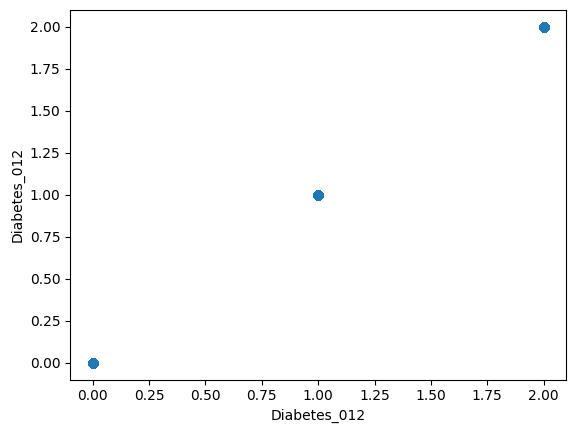

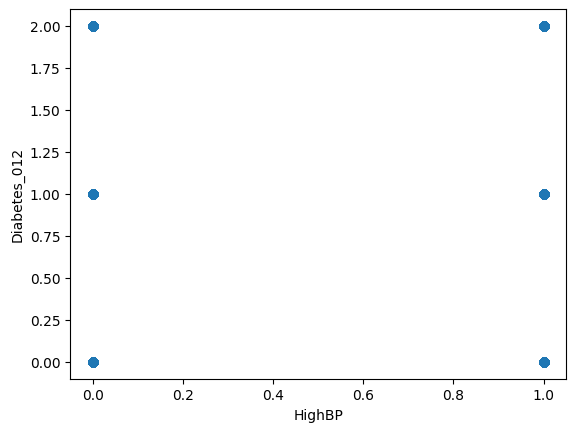

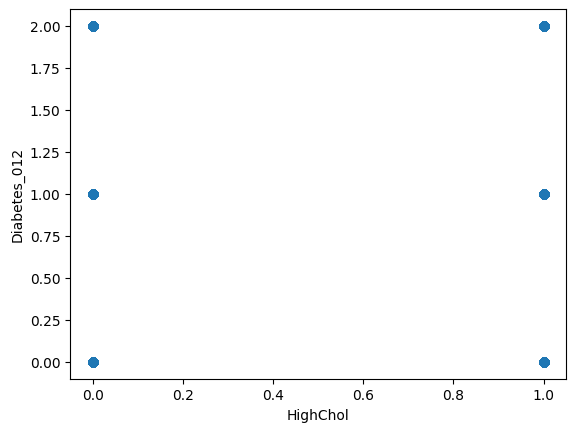

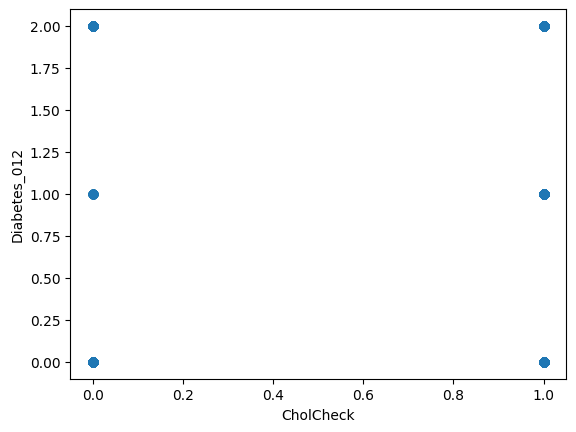

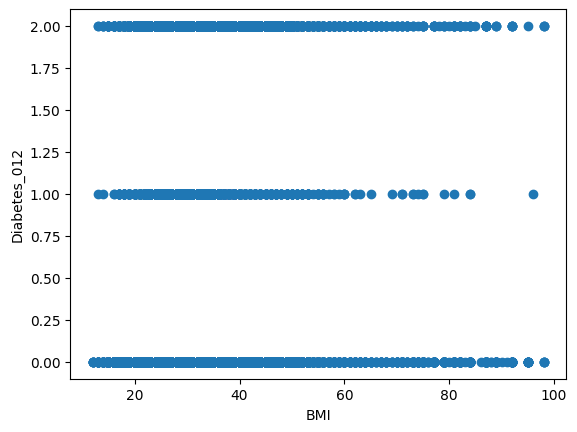

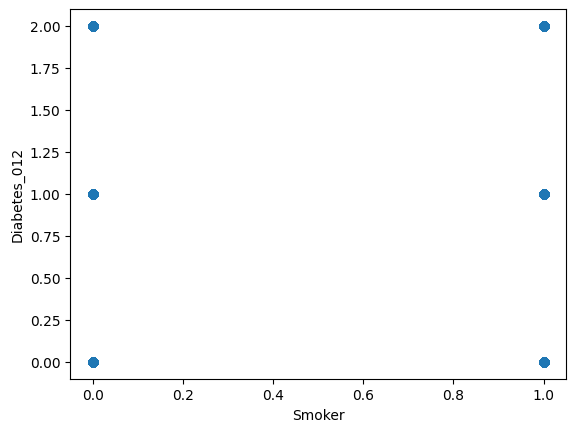

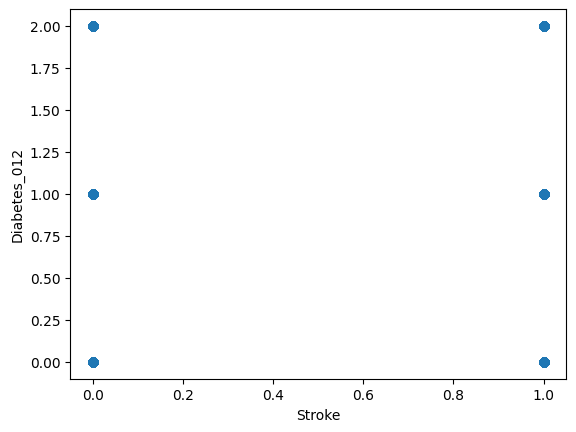

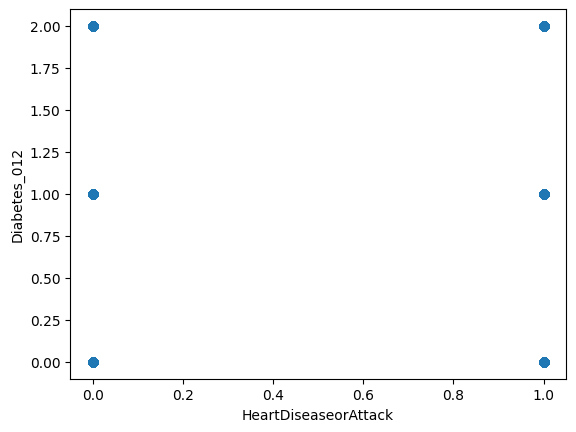

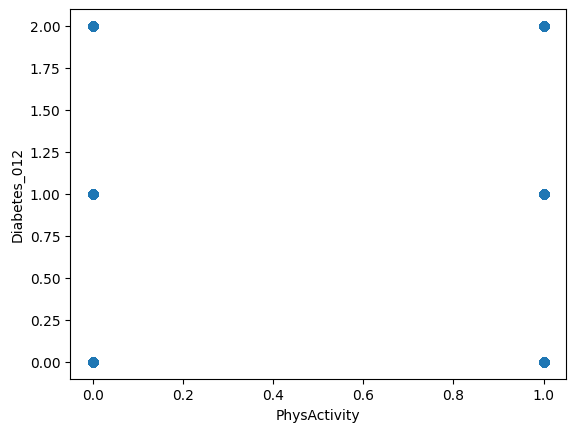

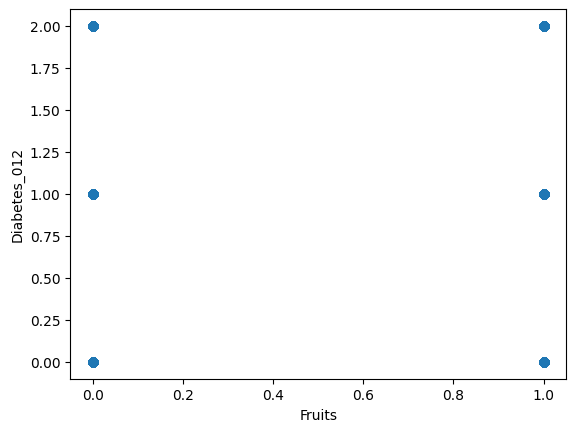

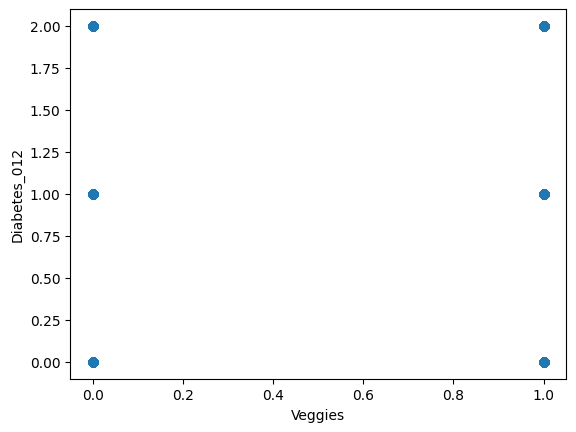

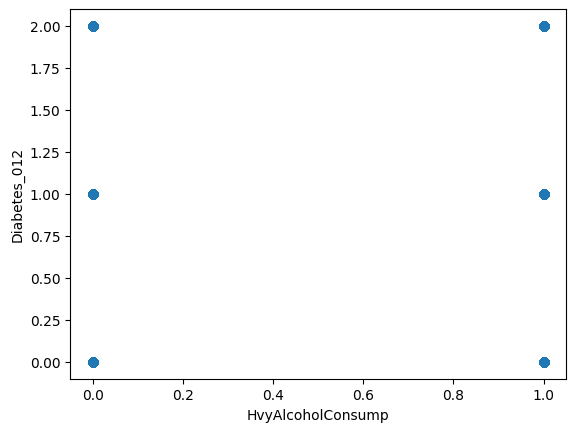

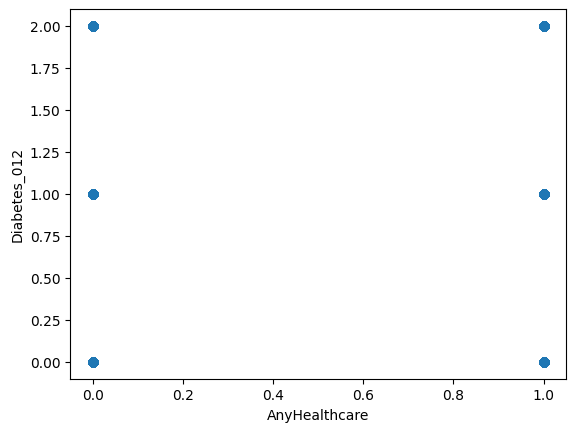

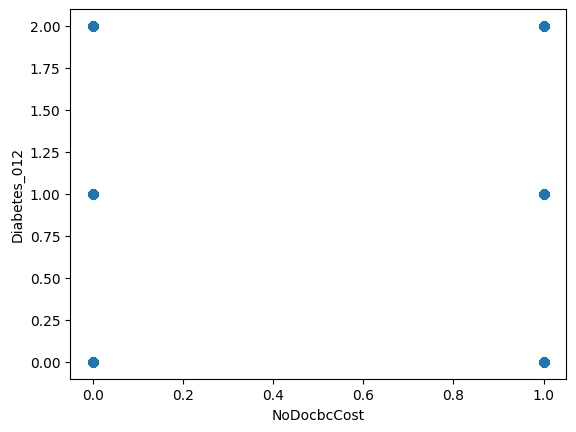

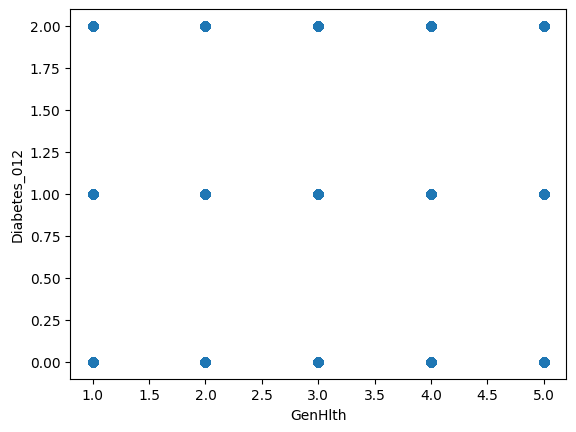

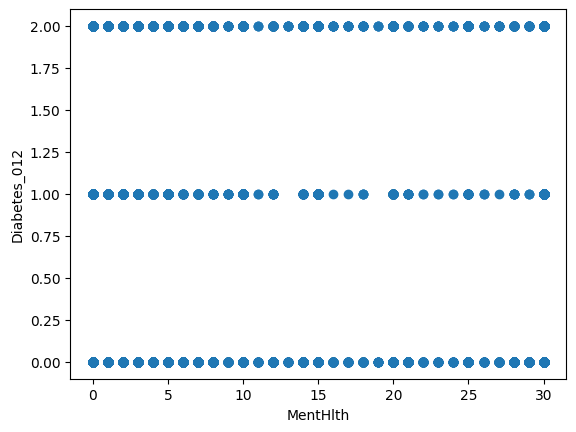

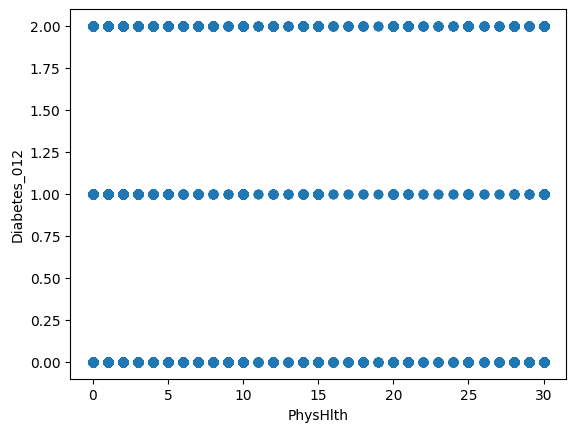

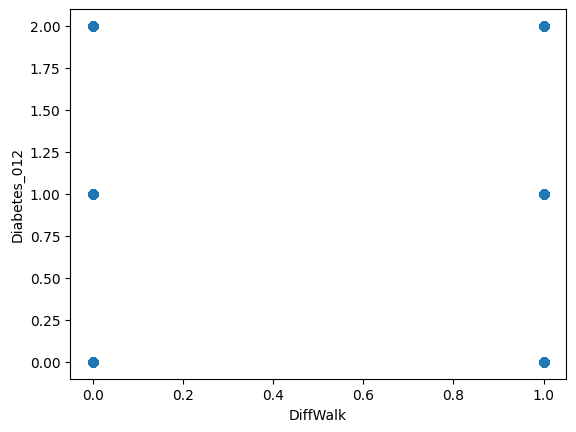

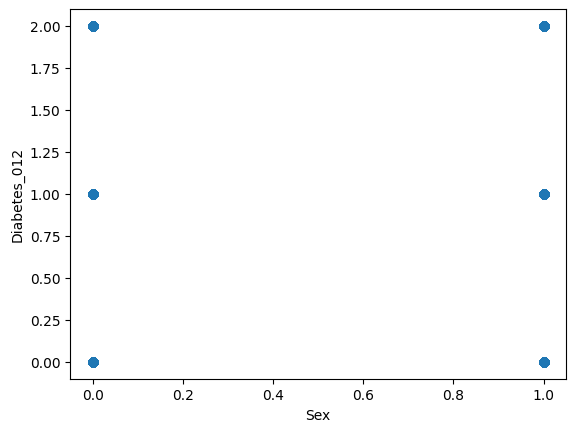

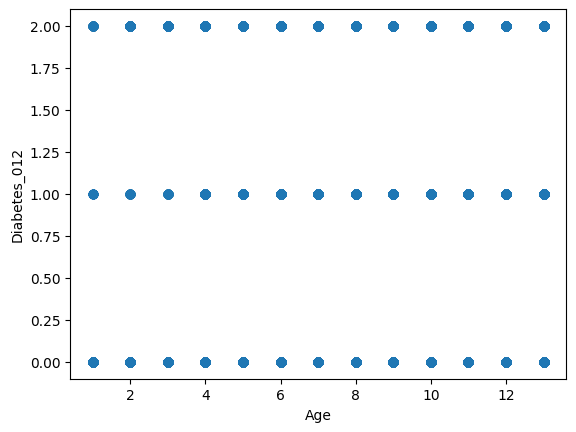

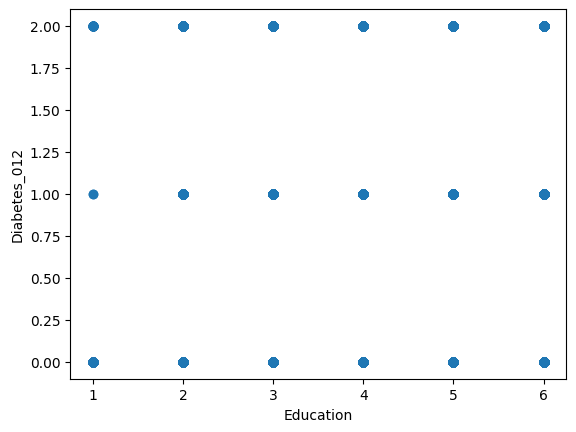

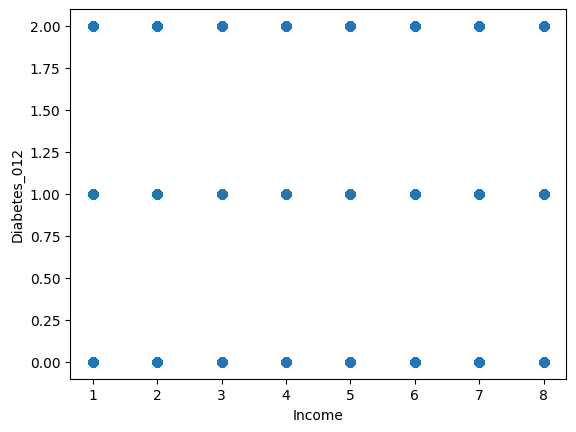

In [9]:
for i in data.columns:
  plt.scatter(data[i],data['Diabetes_012'])
  plt.xlabel(i)
  plt.ylabel("Diabetes_012")
  plt.show()

##Multivariate

HeatMap

<Axes: >

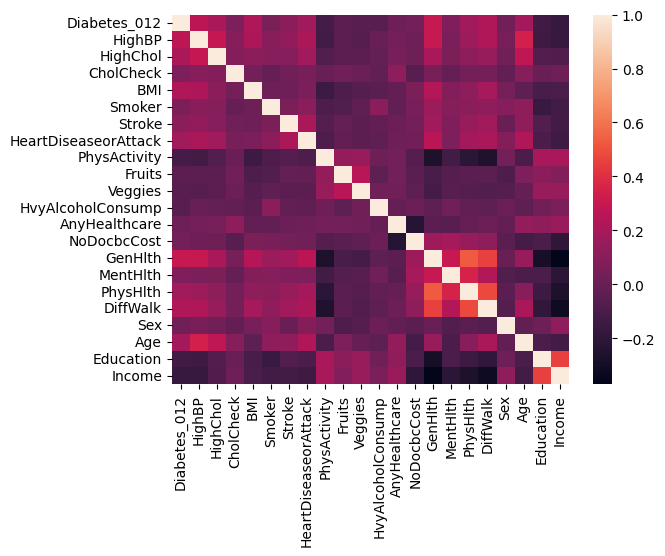

In [10]:
sns.heatmap(data.corr())

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
df=data.copy()

In [13]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [15]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.095675,1.124132,0.205356,1.667220,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,0.508092,...,0.238745,-0.319852,2.253111,1.879074,1.141300,2.095383,-0.885023,0.295241,-0.987588,-1.381324
1,-0.912679,-0.889575,-4.869594,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-1.258473,-1.968149,...,-4.188578,3.126450,0.374618,-0.454434,-0.516791,-0.477240,-0.885023,-0.351213,1.026729,-2.337131
2,1.095675,1.124132,0.205356,-0.101037,-0.933526,-0.216455,-0.339257,-1.658403,0.794614,-1.968149,...,0.238745,3.126450,2.253111,3.434746,2.799391,2.095383,-0.885023,0.295241,-0.987588,1.008193
3,1.095675,-0.889575,0.205356,-0.248391,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.477240,-0.885023,0.941695,-1.994746,0.052387
4,1.095675,1.124132,0.205356,-0.690456,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.065516,-0.516791,-0.477240,-0.885023,0.941695,0.019571,-0.903420
5,1.095675,1.124132,0.205356,-0.543101,1.071208,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.295713,-0.477240,1.129914,0.618468,1.026729,1.008193
6,1.095675,-0.889575,0.205356,0.193673,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,-1.968149,...,0.238745,-0.319852,0.374618,-0.454434,1.030760,-0.477240,-0.885023,0.295241,1.026729,0.530290
7,1.095675,1.124132,0.205356,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-1.258473,0.508092,...,0.238745,-0.319852,0.374618,-0.454434,-0.516791,2.095383,-0.885023,0.941695,-0.987588,-0.903420
8,1.095675,1.124132,0.205356,0.193673,1.071208,-0.216455,2.947618,-1.658403,0.794614,0.508092,...,0.238745,-0.319852,2.253111,3.434746,2.799391,2.095383,-0.885023,0.295241,0.019571,-2.337131
9,-0.912679,-0.889575,0.205356,-0.690456,-0.933526,-0.216455,-0.339257,-1.658403,-1.258473,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.477240,1.129914,-0.027986,-0.987588,-1.381324


In [16]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=0, shuffle =True)

In [17]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [18]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [19]:
xre_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
75704,-0.912679,-0.889575,0.205356,-0.837810,-0.933526,-0.216455,-0.339257,0.602990,-1.258473,-1.968149,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.47724,1.129914,-1.967347,0.019571,0.052387
418323,1.095675,1.124132,0.205356,-0.477450,1.071208,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,0.374618,-0.454434,-0.516791,-0.47724,1.129914,0.618468,1.026729,-0.558008
429019,-0.912679,1.124132,0.205356,-0.061168,1.071208,-0.216455,2.947618,-1.658403,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,1.040255,-0.516791,-0.47724,1.129914,0.295241,0.600177,0.327888
305954,1.095675,-0.889575,0.205356,1.667220,-0.933526,-0.216455,-0.339257,0.602990,0.794614,-1.968149,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.47724,1.129914,0.618468,-0.987588,-1.381324
224955,-0.912679,1.124132,0.205356,-0.034854,1.071208,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-1.503875,-0.454434,-0.516791,-0.47724,1.129914,0.117187,1.026729,1.008193


In [21]:
xre_train.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [53]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth=40)
dt.fit(xre_train , yre_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

In [54]:
y_pred_test_dt = dt.predict(xre_test)
from sklearn.metrics import classification_report
print(classification_report(yre_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     32773
         1.0       0.89      0.92      0.90     55235
         2.0       0.85      0.83      0.84     48316

    accuracy                           0.88    136324
   macro avg       0.88      0.87      0.87    136324
weighted avg       0.88      0.88      0.88    136324



In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

RandomForestClassifier(max_depth=16, max_features=16)

In [56]:
y_pred_test_rf = rf.predict(xre_test)
print(classification_report(yre_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91     32773
         1.0       0.86      0.89      0.87     55235
         2.0       0.82      0.80      0.81     48316

    accuracy                           0.86    136324
   macro avg       0.87      0.86      0.86    136324
weighted avg       0.86      0.86      0.86    136324



In [57]:
lg = LogisticRegression(random_state=100)
lg.fit(xre_train,yre_train)

LogisticRegression(random_state=100)

In [58]:
y_pred_test_lg = lg.predict(xre_test)
print(classification_report(yre_test, y_pred_test_lg))

              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69     32773
         1.0       0.51      0.55      0.53     55235
         2.0       0.59      0.54      0.56     48316

    accuracy                           0.58    136324
   macro avg       0.60      0.59      0.59    136324
weighted avg       0.58      0.58      0.58    136324



In [89]:
xgb_model= XGBClassifier(max_depth=20)
xgb_model.fit(xre_train,yre_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [90]:
y_pred_test_xgb = xgb_model.predict(xre_test)

print(classification_report(yre_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     32773
         1.0       0.98      0.98      0.98     55235
         2.0       0.95      0.94      0.95     48316

    accuracy                           0.96    136324
   macro avg       0.95      0.96      0.95    136324
weighted avg       0.96      0.96      0.96    136324



In [91]:
xgb_model.save_model("xgboost_model.model")


C:\Users\shobi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [01:10:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [92]:
import xgboost as xgb
loaded_model = xgb.Booster(model_file="xgboost_model.model")
dtest = xgb.DMatrix(xre_test)  # Create a DMatrix from your new data
predictions = loaded_model.predict(dtest)

In [93]:
predictions

array([[1.8756709e-05, 9.9972135e-01, 2.5983376e-04],
       [1.4598375e-04, 1.5985920e-01, 8.3999485e-01],
       [1.2156946e-01, 2.1055718e-03, 8.7632489e-01],
       ...,
       [9.9993491e-01, 1.0421537e-05, 5.4701006e-05],
       [2.8095287e-01, 8.5879359e-03, 7.1045917e-01],
       [5.4558661e-02, 2.1273285e-02, 9.2416805e-01]], dtype=float32)

In [101]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
ind = 1
test = xre_test[:ind]
xgb_model_loaded.predict(test)[0] == xgb_model.predict(test)[0]


True

In [105]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: c:\Users\shobi\AppData\Local\Microsoft\Windows\INetCache\IE\RTWA5M01
